In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={'font.family': 'sans', 'font.size': 24, 'axes.titlesize':24, 'axes.labelsize':24})
#if you want to know current working dir
os.chdir('../..')

from src.utils import *

%matplotlib inline


In [2]:
# Loading the data
speeds_train_df = pd.read_csv(resources_path('dataset', 'originals', 'speeds_test.csv.gz'), engine='c')
sensors_df = pd.read_csv(resources_path('dataset', 'originals', 'sensors.csv.gz'), engine='c')
events_df = pd.read_csv(resources_path('dataset', 'originals', 'events_train.csv.gz'), engine='c')
street = 0
speeds_train_df.head(5)

,KEY,DATETIME_UTC,KM,SPEED_AVG,SPEED_SD,SPEED_MIN,SPEED_MAX,N_VEHICLES,KEY_2
0,0,2018-12-01 05:45:00,443,149.462750,11.339183,137.530,186.070,24,0_443
1,0,2018-12-01 14:30:00,443,183.164204,18.459800,140.766,223.284,49,0_443
2,0,2018-12-02 01:30:00,443,172.317000,14.873284,161.800,182.834,2,0_443
3,0,2018-12-02 08:00:00,443,181.913414,21.211454,139.148,224.902,58,0_443
4,0,2018-12-03 06:00:00,443,155.443571,19.456223,121.350,218.430,84,0_443


In [3]:
events_df.head(10)

,START_DATETIME_UTC,END_DATETIME_UTC,EVENT_DETAIL,EVENT_TYPE,KM_END,KM_START,KEY,KEY_2
0,2018-07-19 07:34:46,2018-08-01 15:23:17,0.0,Gestione_viabilita,959,954,523.0,523_959
1,2018-07-25 12:20:06,2018-10-12 18:29:37,1.0,Pavimentazione,1814,1821,325.0,325_1814
2,2018-08-01 07:44:00,2018-08-01 16:18:58,2.0,Manutenzione_opere_in_verde,321,282,525.0,525_321
3,2018-08-01 08:14:30,2018-08-01 17:39:13,3.0,Opera_arte,713,712,517.0,517_713
4,2018-08-01 08:18:32,2018-08-01 17:38:27,3.0,Opera_arte,2542,2543,518.0,518_2542
5,2018-08-01 10:27:22,2018-08-01 11:00:19,4.0,Ostacolo_in_carreggiata,273,273,525.0,525_273
6,2018-08-01 10:49:03,2018-08-01 11:32:35,4.0,Ostacolo_in_carreggiata,455,455,35.0,35_455
7,2018-08-01 16:18:36,2018-08-01 18:08:36,4.0,Ostacolo_in_carreggiata,2149,2149,526.0,526_2149
8,2018-08-01 18:30:20,2018-08-01 20:32:25,6.0,Gestione_viabilita,318,315,525.0,525_318
9,2018-08-01 21:25:22,2018-08-02 05:13:01,8.0,Ostacolo_in_carreggiata,2478,2478,547.0,547_2478


In [4]:
sensors_df.head(10)

,KEY,EMERGENCY_LANE,KM,LANES,ROAD_TYPE
0,44.0,0,1410,2,0
1,146.0,0,1473,2,0
2,53.0,0,1421,2,0
3,122.0,0,679,2,0
4,17.0,1,1399,3,1
5,68.0,0,906,1,0
6,532.0,0,1193,1,0
7,88.0,0,475,1,0
8,339.0,0,1038,1,0
9,96.0,0,671,1,0


   KEY         DATETIME_UTC   KM   SPEED_AVG   SPEED_SD  SPEED_MIN  SPEED_MAX  \
0    0  2018-12-01 05:45:00  443  149.462750  11.339183    137.530    186.070   
1    0  2018-12-01 14:30:00  443  183.164204  18.459800    140.766    223.284   
2    0  2018-12-02 01:30:00  443  172.317000  14.873284    161.800    182.834   
3    0  2018-12-02 08:00:00  443  181.913414  21.211454    139.148    224.902   
4    0  2018-12-03 06:00:00  443  155.443571  19.456223    121.350    218.430   

   N_VEHICLES  KEY_2  
0          24  0_443  
1          49  0_443  
2           2  0_443  
3          58  0_443  
4          84  0_443  


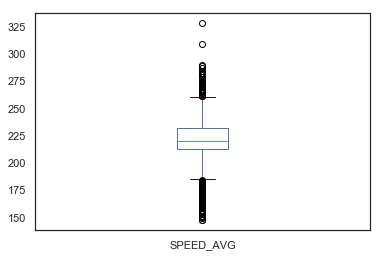

,KEY,KM,SPEED_AVG,SPEED_SD,SPEED_MIN,SPEED_MAX,N_VEHICLES
count,20182.0,20182.000000,20182.000000,20182.000000,20182.000000,20182.000000,20182.000000
mean,0.0,407.692895,222.261189,28.971555,151.628775,294.425332,93.132296
std,0.0,61.476569,30.489523,9.684107,46.644852,48.867291,75.182510
min,0.0,333.000000,59.866000,0.000000,59.866000,59.866000,2.000000
25%,0.0,343.000000,211.504384,23.801246,131.058000,270.206000,32.000000
50%,0.0,411.000000,222.341090,28.269260,160.182000,297.712000,75.000000
75%,0.0,443.000000,236.442770,32.804234,179.598000,326.836000,138.000000
max,0.0,520.000000,358.117333,185.344001,343.016000,462.748000,723.000000


In [5]:
# Processing data
first_sensor = speeds_train_df[(speeds_train_df['KEY'] == street)]
print(first_sensor.head(5))
first_sensor[first_sensor[DATETIME] < '2018-12-02'].plot(x=DATETIME, y=SPEED_AVG, kind='box')
plt.show()
first_sensor.describe()

In [6]:
df = speeds_train_df[[KEY, KM, DATETIME, N_CARS, SPEED_AVG]][speeds_train_df[KEY] == street].sort_values(by=[DATETIME, DATETIME])
print(f'Dataframe lenght: {df.shape}')
sensors = sensors_df[(sensors_df[KEY] == street)].drop_duplicates()
df = df.join(sensors.set_index([KEY, KM]), on=[KEY, KM])
print(f'Dataframe lenght: {df.shape}')
df.head(15)

Dataframe lenght: (20182, 5)
Dataframe lenght: (20182, 8)


,KEY,KM,DATETIME_UTC,N_VEHICLES,SPEED_AVG,EMERGENCY_LANE,LANES,ROAD_TYPE
698139,0,337,2018-12-01 00:00:00,92,225.605478,1,2,1
1569379,0,443,2018-12-01 00:00:00,6,185.800333,1,2,1
2093456,0,411,2018-12-01 00:00:00,11,215.046909,1,2,1
2964877,0,333,2018-12-01 00:00:00,49,250.096571,1,2,1
3313912,0,343,2018-12-01 00:00:00,46,215.580913,1,2,1
3314338,0,357,2018-12-01 00:00:00,36,236.992056,1,2,1
175034,0,411,2018-12-01 00:15:00,8,227.329000,1,2,1
523726,0,337,2018-12-01 00:15:00,78,223.035077,1,2,1
1046688,0,357,2018-12-01 00:15:00,43,240.028419,1,2,1
1569523,0,343,2018-12-01 00:15:00,58,224.678828,1,2,1


In [ ]:
# Some plots
df.plot(y=[SPEED_AVG, N_CARS], kind='box')
plt.show()

## Plots for searching correlations in a single road

In [ ]:
df_to_plot = df[[DATETIME, SPEED_AVG, N_CARS, KM]].sort_values(by=[DATETIME, KM])
df_to_plot = df_to_plot[df_to_plot.DATETIME_UTC < '2018-12-02'].head(500)
print(df_to_plot.head(10))
df_to_plot.describe()

In [ ]:
sns.boxplot(data=df_to_plot.SPEED_AVG);

In [ ]:
sns.boxplot(data=df_to_plot.N_VEHICLES);

In [ ]:
sns.lineplot(x=df_to_plot.DATETIME_UTC, y=df_to_plot.N_VEHICLES);

In [ ]:
sns.lineplot(x=df_to_plot.DATETIME_UTC, y=df_to_plot.SPEED_AVG);

In [ ]:
sns.pairplot(df_to_plot);

# Events

In [10]:
ev_df = events_df[events_df.KEY == street].sort_values([KM_START, START_DATETIME])
ev_df.describe()

,EVENT_DETAIL,KM_END,KM_START,KEY
count,509.000000,509.000000,509.000000,509.0
mean,18.734774,417.247544,411.858546,0.0
std,18.756479,56.574228,54.702701,0.0
min,0.000000,331.000000,331.000000,0.0
25%,4.000000,370.000000,367.000000,0.0
50%,13.000000,412.000000,404.000000,0.0
75%,21.000000,460.000000,453.000000,0.0
max,74.000000,522.000000,521.000000,0.0


KeyError: 0

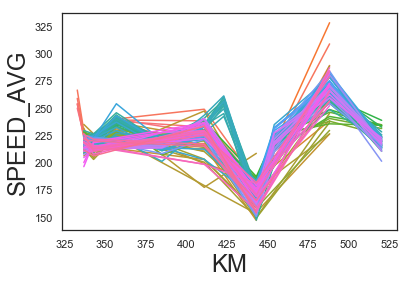

In [11]:
df = df[df.DATETIME_UTC < '2018-12-02']
sns.lineplot(x=df.KM, y=df.SPEED_AVG, hue=df.DATETIME_UTC, legend=False);

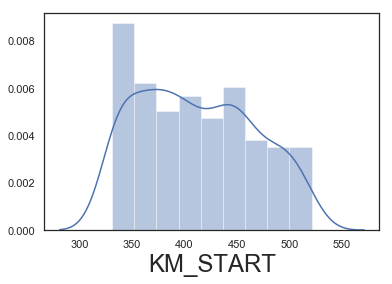

In [16]:
sns.distplot(ev_df[KM_START]);